This notebook is prepared by ApplAi's Technical And Training Depratment, Please 
Don't use it outside the training without asking for permission as it's considered as Violation of Intellectual property rights

![ApplAi's Logo](https://media-exp1.licdn.com/dms/image/C4E0BAQHGLGltI2rzuQ/company-logo_200_200/0?e=2159024400&v=beta&t=adq8rNV09dPC6egdJMnfARt6Aq0TC9bSomFvFtm50WM)

# **Introduction**


In this notebook, you will implement linear regression algorithm and apply it to the game's dataset. The dataset is based on the realtion between relative width of an object and the actual distance. We strongly recommend Asking your colleagues and your Coach Using Questions And Discussions Channel on Microsoft Teams.

#### Run the next cell to import the needed libraries and to load the dataset and Plot Dataset


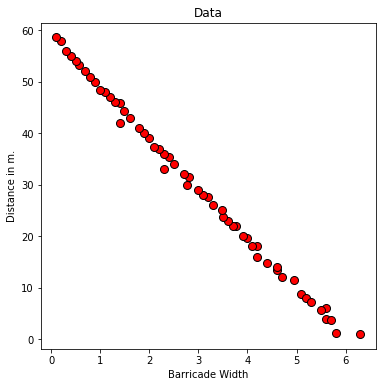

In [ ]:
import numpy as np                          # Dealing with Numpy Arrays
import matplotlib.pyplot as plt             # matplotlib is used for ploting graphs
from IPython.display import HTML
import pandas as pd

# Lets the plots appears in the notebook
%matplotlib inline

data = pd.read_excel("Training Data .xlsx")
iterations = 150

# Split the Data To X and Y where X is the input Feature (Size) and Y is the Output (Price)

X = data.iloc[:, 0].values
Y = data.iloc[:, 1].values

X = X.reshape(X.shape[0],-1)
Y = Y.reshape(Y.shape[0],-1)

plt.figure(figsize=(6, 6))
plt.plot(X, Y, 'ro', ms=8, mec='k')
plt.title("Data")
plt.xlabel('Barricade Width')
plt.ylabel('Distance in m.')
plt.grid(False)

This is the hypothesis function that predicts based on the theta parameters that you provide.

In [ ]:
def Predictive_Line(X, Theta):

    Predictions = None
    X = np.append(np.ones((1,X.shape[0])), X.reshape((1,X.shape[0])), axis = 0)

  # ==================== YOUR CODE HERE =================================
    Predictions = np.dot(Theta.T, X)
  # =====================================================================
  
    Predictions = Predictions.T
    return Predictions

This is the funcion for calculating cost to improve your model accuracy by adjusting the alpha parameter.

In [ ]:
def Calculate_Cost(X, Theta, Y):
    m = Y.shape[0]
    J = 0
  # ==================== YOUR CODE HERE =================================
    p = Predictive_Line(X, Theta.T)
    J = (1/(2*m)) * np.sum(((p - Y)**2), axis=0)
  # ===================================================================== 
    return J

This is the Gradient Descent function

In [ ]:
def Gradient_Descent(X, Y, Theta, alpha, num_iters):
    m = Y.shape[0]
    J= []
        # ==================== YOUR CODE HERE =================================
    X1 = np.append(np.ones(X.shape), X, axis = 1)
    for i in range(num_iters):
      p = Predictive_Line(X, Theta.T)
      Theta = Theta - ( (alpha / m) * np.sum((p - Y) * (X1),axis=0))
      J.append(Calculate_Cost(X,Theta,Y))
        # =====================================================================
    return Theta,J

Here we apply the training process

In [ ]:
Theta,J = Gradient_Descent(X, Y, Theta = np.array([0,0]).reshape((1,2)), alpha = 0.14,num_iters = iterations)
#J  = Calculate_Cost(X, Theta.T,Y)
P = Predictive_Line(X, Theta.T)

The plotting of the predicted line on the training data.

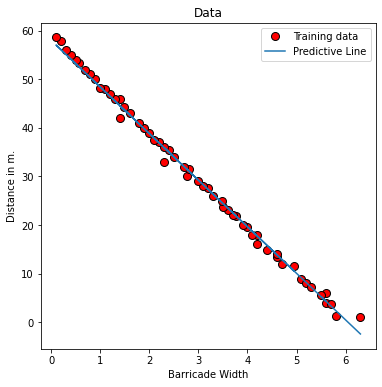

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(X, Y, 'ro', ms=8, mec='k')
plt.title("Data")
plt.xlabel('Barricade Width')
plt.ylabel('Distance in m.')
plt.grid(False)
plt.plot(X, P, '-')
plt.legend(['Training data', 'Predictive Line']);

Text(0, 0.5, 'Cost J')

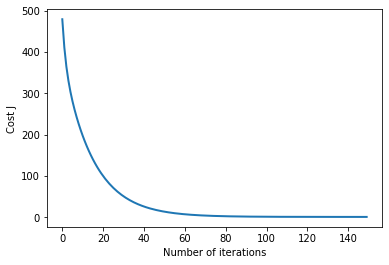

In [ ]:
plt.plot(np.arange(len(J)), J, lw=2)

plt.xlabel('Number of iterations')
plt.ylabel('Cost J')   

Here we read the data and get the predictions.

In [ ]:
test = pd.read_csv('Test Data.txt',header = None).to_numpy()
test_data_distances = Predictive_Line(test, Theta.reshape(2,1))
print(test_data_distances)

[[31.53301939]
 [39.78034189]
 [49.37025176]]


At last we convert the results to a downloadable text file.

In [ ]:
import sys
f = open("Distances.txt", "w")
for i in test_data_distances:
  print(i[0], file = f)
f.close()